# Preprocessing

##### Assign the feature names within ad.names to the columns of ad.data, and create the feature matrix and target vector while doing so.

In [51]:
# Imports
import pandas as pd     

# Import the dataset.
dataset = pd.read_csv('../datasets/ads/ad.data')

# Assign the feature names to the dataset using the .names file.
with open('../datasets/ads/adNames.txt', 'r') as file:
    feature_names = [line.split(':')[0] for line in file.readlines()]
    
# Create the feature matrix by dropping the last column (which is the target
# variable column), and assign the names to the feature matrix.
feature_matrix = dataset.drop(['ad.'], axis=1)
feature_matrix.columns = feature_names

# Create the target vector by taking the last entry of the dataset and encode
# the target vector.
target_vector = dataset['ad.'].map({'ad.': 1, 'nonad.': 0})

# Create the named dataset; the dataset with named features and including the 
# target_vector. exp_df is meant only to use to export the data; no other
# operations should be done on this dataframe.
exp_df = feature_matrix
exp_df['ads'] = target_vector

# Export the full_df
# exp_df.to_csv('full_df.csv')


C:\Users\Quang\AppData\Local\Temp\ipykernel_13216\2390612365.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('../datasets/ads/ad.data')


##### Clean the data; note that missing values are listed as "?" because whoever put together this dataset is a moron.

In [52]:
################################################################################
# Find missing values
################################################################################

# Locate all non-numeric values and remove them.
numeric_df = exp_df.apply(pd.to_numeric, errors='coerce')

# Plot a histogram of all the continuous variables.
import numpy as np
import matplotlib.pyplot as plt

# # Height uncleaned histogram
# plt.figure(1, figsize=(10,15))
# plt.subplot(3, 1, 1)
# plt.hist(numeric_df['height'])
# plt.xlabel('Height, in pixels')
# plt.ylabel('Occurances')
# plt.title('Histogram of Height')
# plt.tight_layout()

# # Width uncleaned histogram
# plt.subplot(3, 1, 2)
# plt.hist(numeric_df['width'])
# plt.xlabel('Width, in pixels')
# plt.ylabel('Occurances')
# plt.title('Histogram of Width')
# plt.tight_layout()

# # Aratio uncleaned histogram
# plt.subplot(3, 1, 3)
# plt.hist(numeric_df['aratio'])
# plt.xlabel('Aratio')
# plt.ylabel('Occurances')
# plt.title('Histogram of Aratio')
# plt.tight_layout()

In [53]:
# Locate all columns with missing values.
missings = numeric_df.loc[:, numeric_df.isnull().any()]

################################################################################
# Use KNN imputation to fill in the missing values.
################################################################################
from sklearn.impute import KNNImputer
from sklearn.preprocessing import *

# TODO
# Test different scalers
# Use RobustScaler to avoid pruning outliers, since we can't easily determine 
# if they're actually outliers.
scaler = RobustScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# TODO
# Test different n_neighbors; sqrt(n) works relatively well.
# Use some percent of the data as the number of neighbors for the imputer.
knn_imputer = KNNImputer(copy=False, n_neighbors = round(np.sqrt(numeric_df.shape[0])))

# Scale and impute the dataset.
scaled_and_imputed_nd = knn_imputer.fit_transform(data_scaled)

# Unscale the dataset
unscaled_and_imputed_nd = scaler.inverse_transform(scaled_and_imputed_nd)
unscaled_and_imputed_df = pd.DataFrame(unscaled_and_imputed_nd)

# Post process the "aratio" feature by rounding all values >= 0.5, and flooring
# the rest.
unscaled_and_imputed_df[3] = unscaled_and_imputed_df[3].apply(round)

# Append ads to feature names
feature_names.append('ad.')

# Apply the feature names to the dataframe, again.
unscaled_and_imputed_df.columns = feature_names

# # Save the above under clean_df
clean_df = unscaled_and_imputed_df
# clean_df.to_csv('clean_df.csv')

# # Plot the histograms again, this time of the cleaned values

# # Height uncleaned histogram
# plt.figure(2, figsize=(10,15))
# plt.subplot(3, 1, 1)
# plt.hist(clean_df['height'])
# plt.xlabel('Height, in pixels')
# plt.ylabel('Occurances')
# plt.title('Histogram of Height')
# plt.tight_layout()

# # Width uncleaned histogram
# plt.subplot(3, 1, 2)
# plt.hist(clean_df['width'])
# plt.xlabel('Width, in pixels')
# plt.ylabel('Occurances')
# plt.title('Histogram of Width')
# plt.tight_layout()

# # Aratio uncleaned histogram
# plt.subplot(3, 1, 3)
# plt.hist(clean_df['aratio'])
# plt.xlabel('Aratio')
# plt.ylabel('Occurances')
# plt.title('Histogram of Aratio')
# plt.tight_layout()


##### Conduct EDA

In [54]:
# Imports
import numpy as np
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
#STEP 1: intial understanding of the clean dataset

#target variable- image that is going to be classfied as ad or non-ad
#this shows the class distribution of the target variable
# lean_df['ad.'].value_counts().plot(kind='bar')
# plt.xlabel('Ad.')
# plt.ylabel('Count')
# plt.title('The distribution of the target variable')
#there is a imbalance between ad/ non-ad need to find a way to decrease class imbalance 

In [55]:
#STEP 2: Data quality assessment 
#-skipping for now since you did most of the cleaning already but we can come back to this step later 

In [56]:
# #STEP 3: find features that have strong correlation with target variable
# from scipy.stats import pointbiserialr

# # Calculate the point-biserial correlation coefficient
# corr1, p_value1 = pointbiserialr(clean_df['height'], clean_df['ad.'])
# corr2, p_value2 = pointbiserialr(clean_df['width'], clean_df['ad.'])
# corr3, p_value3 = pointbiserialr(clean_df['aratio'], clean_df['ad.'])


# print("Point-biserial correlation coefficient of height:", corr1)
# print("p-value:", p_value1)
# print("Point-biserial correlation coefficient of width:", corr2)
# print("p-value:", p_value2)
# print("Point-biserial correlation coefficient of aratio:", corr3)
# print("p-value:", p_value3)


In [57]:
#Using Chi-squared test to assess asociations between binary features and target feature
from scipy.stats import chi2_contingency

chi2_results = {}
# Exclude the first four columns and the target column
for col in clean_df.columns[4:]:  # Start from the 5th column
    if col != 'ad.':  # Exclude the target variable itself
        contingency_table = pd.crosstab(clean_df[col], clean_df['ad.'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[col] = chi2  # Store the Chi-squared statistic

# Sort features by Chi-squared statistic
sorted_chi2_results = sorted(chi2_results.items(), key=lambda x: x[1], reverse=True)

# Print the top n features with the strongest correlation
top_feats = sorted_chi2_results[:50]  # Get the top n features
for feature, chi2_value in top_feats:
    print(f"{feature}: Chi-squared = {chi2_value:.4f}")

ancurl*com: Chi-squared = 1085.6134
url*ads: Chi-squared = 886.2597
ancurl*click: Chi-squared = 846.8578
alt*click: Chi-squared = 646.6715
ancurl*redirect: Chi-squared = 633.3237
ancurl*ng: Chi-squared = 618.3402
alt*click+here: Chi-squared = 615.3102
alt*here: Chi-squared = 593.8869
ancurl*adid: Chi-squared = 533.5903
ancurl*type: Chi-squared = 533.5903
ancurl*event: Chi-squared = 475.3352
ancurl*ng+type: Chi-squared = 468.8835
ancurl*runid: Chi-squared = 468.8835
ancurl*event+ng: Chi-squared = 468.8835
ancurl*type+click: Chi-squared = 468.8835
ancurl*profileid: Chi-squared = 468.8835
ancurl*2f: Chi-squared = 462.4361
ancurl*redirect+http: Chi-squared = 455.9930
ancurl*http+2f: Chi-squared = 455.9930
ancurl*http+www: Chi-squared = 444.4478
alt*for: Chi-squared = 364.4912
ancurl*2f+2fwww: Chi-squared = 308.9901
ancurl*2fwww: Chi-squared = 308.9901
alt*here+for: Chi-squared = 294.6246
ancurl*familyid: Chi-squared = 292.7183
ancurl*groupid: Chi-squared = 292.7183
ancurl*tagvalues: Chi-sq

In [58]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Extract feature names and create a DataFrame
# top_features = [feature for feature, _ in top_30_chi2_results]
# top_features.append('ad.')  # Include target variable for correlation

# # Subset the original DataFrame
# subset_df = clean_df[top_features]

# # Calculate correlation matrix for the subset
# correlation_matrix = subset_df.corr()

# # Create heatmap to show correlation between top features and target (useful for PCA later)
# plt.figure(figsize=(36, 30))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# plt.title('Heatmap of Top 30 Features Correlating with Target Variable')
# plt.show()

In [59]:
# #STEP 4: Visualizing numerical and categorical data to find outliers

# #numerical data visualization
# # Select the first three numerical columns
# numerical_columns = clean_df.columns[:3]

# # Generate box plots for the first three numerical columns 
# plt.figure(figsize=(15, 5))  # Adjust figure size as necessary
# for i, col in enumerate(numerical_columns, 1):
#     plt.subplot(1, 3, i)  # Arrange plots in a single row
#     sns.boxplot(data=clean_df, y=col)
#     plt.title(f'Box Plot of {col}')
#     plt.ylabel(col)

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()

# # Calculate summary statistics for the first three numerical columns
# summary_statistics = clean_df[numerical_columns].describe()
# print(summary_statistics)

In [60]:
# # Plot frequency distribution for each feature
# plt.figure(figsize=(25, 30))  # Adjust figure size as necessary
# for i, feature in enumerate(top_features, 1):
#     plt.subplot(10, 6, i)  # Arrange plots in a 6x5 grid
#     ax = sns.histplot(subset_df[feature], discrete=True) # Use histplot for continuous features
    
#     # Add labels on top of the bars
#     for container in ax.containers:
#         ax.bar_label(container, label_type="edge")  # Set label position to 'edge' or 'center'
        
#     plt.title(feature)
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
    

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()

#results show that there is a class imbalance with most categorical classes being 0 and less 1s.

### SVM Model Planning / Notes

#### Using the top n chi-squared features, generate 4 svm models with different kernels to test the performance of each kernel, then, expand upon this; ensemble SVM? Bagging? We'll see.
#### How important are chi squared and correlation to model performance? We'll see.

We also expect that the linear kernel should perform quite well, since the majority of our features are binary.

Experimental Ideas:

Train a SVM model using continuous features,
Train another one using only binary features, 
Which one works better?
Can we use them as ensemble?

Do we really need to feature engineer if there are already 1556 features?


### SVM Implementation

In [61]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Shuffle the dataframe. 
shuffled_df = clean_df.sample(frac=1, random_state=69420).reset_index(drop=True)

# Scale the features using Robust Scaler
scaler = RobustScaler()
scaled_scaled_df = pd.DataFrame(scaler.fit_transform(shuffled_df), columns=shuffled_df.columns)

# Create the target vector, y, and feature matrix X.
y = scaled_scaled_df['ad.']
X = scaled_scaled_df.drop('ad.', axis=1)

# Train on 85% of data, test on 10%, val on 5%.
# Step 1: Split 85% for training and 15% for test+validation
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=69420)

# Step 2: Split temp_df into 10% test and 5% validation
X_test, X_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=1/3, random_state=69420)

# Check the sizes to confirm
print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"Validation set: {len(X_val)} samples")


Training set: 2786 samples
Testing set: 328 samples
Validation set: 164 samples


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best C value: 0.03114141414141414
Best cross-validated accuracy: 0.9809
ROC AUC Score: 0.9747


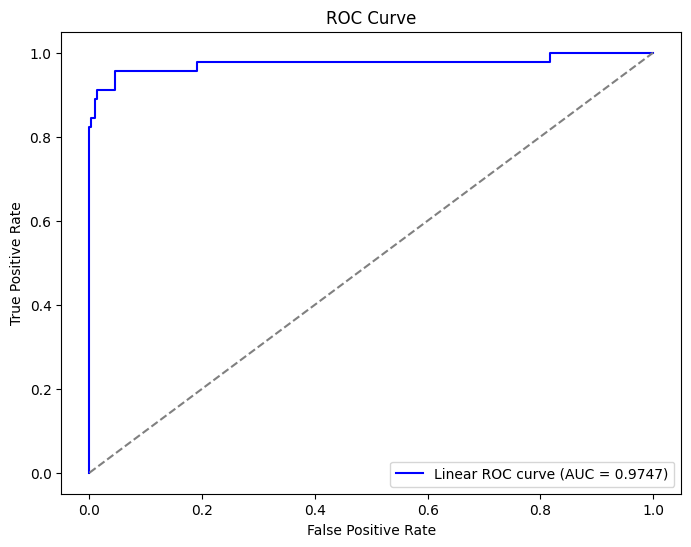

In [62]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

################################################################################
# Grid Search CV: Find the best C.
################################################################################

# From preliminary testing: 0.030 is best ROC; further refine.
param_grid = {'C': np.linspace(0.031, 0.032, num=100)}

# Instantiate an instance of a linear SVM.
linear_svm = SVC(kernel='linear')

# Perform grid search with cross-validation, using 5 fold: 80% of the data is
# used for training.
grid_search = GridSearchCV(linear_svm, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_linear_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

# Print C and Evals
print(f"Best C value: {best_linear_C}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

################################################################################
# Model Implementation: K: Linear, C: Best
################################################################################
svm_model_lin_cBest = SVC(kernel='linear', C=best_linear_C)  # C is the regularization parameter
svm_model_lin_cBest.fit(X_train, y_train)
y_pred_lin_c1 = svm_model_lin_cBest.predict(X_test)

# Calculate decision function values
y_scores_lin_c1 = svm_model_lin_cBest.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_lin_c1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Linear ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


##### Do the same thing as above, with a polynomial decision boundary

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best C value: 4.471717171717172
Best cross-validated accuracy: 0.9678
ROC AUC Score: 0.9686


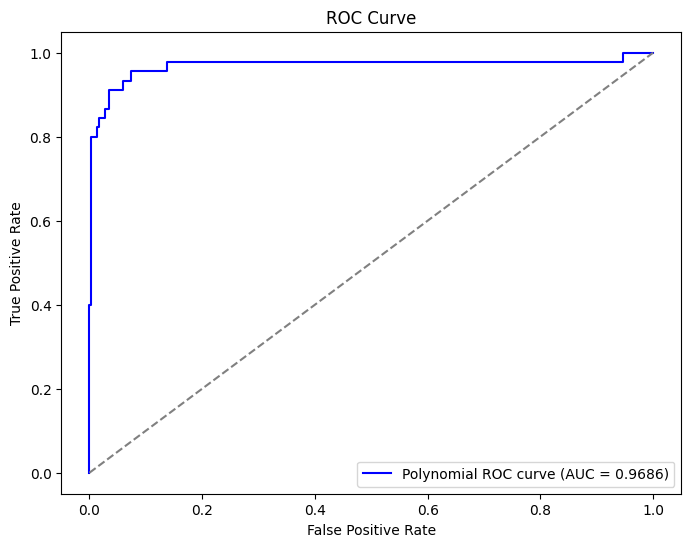

In [63]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

################################################################################
# Grid Search CV: Find the best C.
################################################################################

# From preliminary testing: 4.27 is best ROC; further refine.
param_grid = {'C': np.linspace(4.46, 4.48, num=100)}

# Instantiate an instance of a linear SVM, fix the polynomial degree
poly_svm = SVC(kernel='poly', degree=4)

# Perform grid search with cross-validation, using 5 fold: 80% of the data is
# used for training.
grid_search = GridSearchCV(poly_svm, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_poly_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

# Print C and Evals
print(f"Best C value: {best_poly_C}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

################################################################################
# Model Implementation: K: Linear, C: Best
################################################################################
svm_model_poly_cBest = SVC(kernel='poly', C=best_poly_C, degree=4)  # C is the regularization parameter
svm_model_poly_cBest.fit(X_train, y_train)
y_pred_poly_c1 = svm_model_poly_cBest.predict(X_test)

# Calculate decision function values
y_scores_poly_c1 = svm_model_poly_cBest.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_poly_c1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Polynomial ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### RBF

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best C value: 3.078787878787879
Best cross-validated accuracy: 0.9694
ROC AUC Score: 0.9790


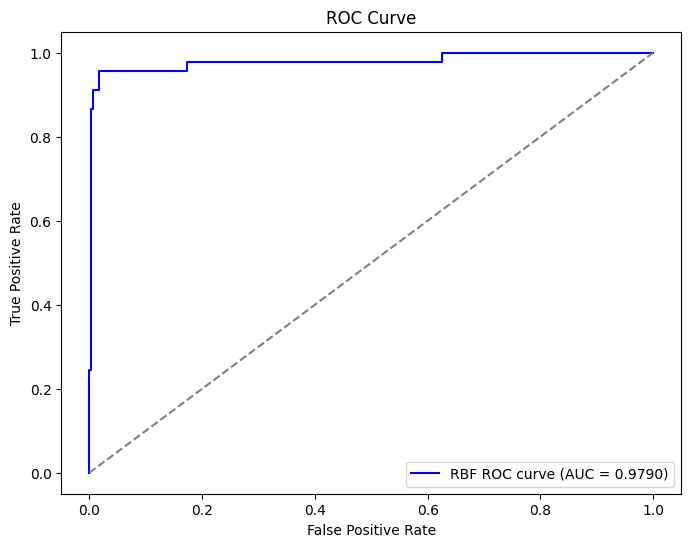

In [64]:
################################################################################
# Grid Search CV: Find the best C.
################################################################################

# From preliminary testing: 0.03 is best ROC; further refine.
param_grid = {'C': np.linspace(3.06, 3.08, num=100)}

# Instantiate an instance of a linear SVM, fix the polynomial degree
rbf_svm = SVC(kernel='rbf')

# Perform grid search with cross-validation, using 5 fold: 80% of the data is
# used for training.
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_rbf_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

# Print C and Evals
print(f"Best C value: {best_rbf_C}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

################################################################################
# Model Implementation: K: Linear, C: Best
################################################################################
svm_model_rbf_cBest = SVC(kernel='rbf', C=best_rbf_C)  # C is the regularization parameter
svm_model_rbf_cBest.fit(X_train, y_train)
y_pred_rbf_c1 = svm_model_rbf_cBest.predict(X_test)

# Calculate decision function values
y_scores_rbf_c1 = svm_model_rbf_cBest.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rbf_c1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'RBF ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Sigmoid Kernel (when tf would u use this? not applicable in our case.)